# Úkol 2

In [1]:
import pandas

countries = pandas.read_csv("countries.csv")
data_a = pandas.read_csv("ukol_02_a.csv")
data_b = pandas.read_csv("ukol_02_b.csv")

## Inflace

V souboru [ukol_02_a.csv](soubory_02/ukol_02_a.csv) najdeš procenta lidí, kteří považují inflaci a růst životních nákladů za jeden ze svých nejzávažnějších problémů. Data jsou za dvě období - léto 2022 (sloupec 97) a zima 2022/2023 (sloupec 98). Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

Je vhodné provést následující postup:

- Test normality obou skupin dat. Podle toho zjistíš, zda je lepší provést parametrický nebo neparametrický test.
- Formulace hypotéz testu.
- Výběr vhodného testu. Vhodný je test, který jsme na lekci nepoužívali, ale je v seznamu testů, který je součástí lekce 6. Důležité je uvědomit si, že **porovnáváme tu samou skupinu států ve dvou různých časových obdobích**.
- Formulace výsledek testu (na základě p-hodnoty).

Nejprve uvažuji všechny státy v průzkumu.

Hypotézy jsou obdobné, pouze jednou se týkají dat z léta 2022 a jednou ze zimy 2022/2023.

- H0: Procento lidí, kteří řadí inflaci mezi své největší problémy, má normální rozdělení
- H1: Procento lidí, kteří řadí inflaci mezi své největší problémy, nemá normální rozdělení

In [2]:
import pandas
from scipy import stats

res = stats.shapiro(data_a["98"])
res

ShapiroResult(statistic=0.9803104996681213, pvalue=0.687289297580719)

In [3]:
res = stats.shapiro(data_a["97"])
res

ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)

Nezamítáme hypotézu normálního rozdělení. Jedná se o párová pozorování (jeden stát, dvě období). Z toho důvodu použiju párový t-test.

Hypotézy:
H0: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se nezměnilo.
H1: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se změnilo.

In [4]:
stats.ttest_rel(data_a["97"], data_a["98"])

TtestResult(statistic=3.868878598419143, pvalue=0.0003938172257904746, df=40)

p-hodnota je menší než 0.05. Zamítám nulovou hypotézu. Průměrné procento lidí, kteří považují inflaci za jeden ze svých hlavních problémů, se změnilo.

In [5]:
data_a = pandas.merge(data_a, countries)
print(stats.shapiro(data_a["98"]))
print(stats.shapiro(data_a["97"]))
stats.ttest_rel(data_a["97"], data_a["98"])

ShapiroResult(statistic=0.9399222135543823, pvalue=0.12131019681692123)
ShapiroResult(statistic=0.952153205871582, pvalue=0.24169494211673737)


TtestResult(statistic=3.4869444202944764, pvalue=0.0017533857526091583, df=26)

Pro státy EU se p-hodnoty liší, ale postup a závěry jsou stejné.

## Důvěra ve stát a v EU

Ve výzkumu je dále zkoumáno, jak moc lidé věří své národní vládě a jak moc věří EU. Data jsou v souboru [ukol_02_b.csv](soubory_02/ukol_02_b.csv). Číslo udává procento lidí, kteří dané instituci věří. Ověř, zda existuje korelace mezi procentem lidí, které věří EU v každé ze zemí, a procentem lidí, kteří EU nevěří.


- H0: Procento lidí, kteří věří své národní vládě, má normální rozdělení
- H1: Procento lidí, kteří věří své národní vládě, nmá normální rozdělení

In [6]:
data_b = pandas.merge(data_b, countries)

res = stats.shapiro(data_b["National Government Trust"])
res

ShapiroResult(statistic=0.9438267350196838, pvalue=0.15140558779239655)

In [7]:
res = stats.shapiro(data_b["EU Trust"])
res

ShapiroResult(statistic=0.9735807180404663, pvalue=0.6981646418571472)

Normalitu nezamítáme, použijeme tedy Pearsonův test

H0: Důvěra v národní vládu a důvěra v EU jsou lineárně nezávislé
H1: Důvěra v národní vládu a důvěra v EU jsou lineárně závislé

In [8]:
res = stats.pearsonr(data_b["National Government Trust"], data_b["EU Trust"])
res

PearsonRResult(statistic=0.6097186340024556, pvalue=0.0007345896228823406)

Zamítáme nulovou hypotézu, existuje lineární závislost mezi důvěrou v EU a důvěrou v národní vládu.

## Důvěra ve stát e euro

Nakonec si rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? Využij znovu data o důvěře v EU ze souboru [ukol_02_b.csv](soubory_02/ukol_02_b.csv) a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni. Porovnej, jak se liší důvěra v EU v těchto dvou skupinách zemí. Státy můžeš rozdělit s využitím tabulky v souboru [countries.csv](countries.csv).

H0: Průměrná důvěra v EU se neliší ve státech v eurozónu a ve státech mimo eurozónu
H1: Průměrná důvěra v EU se liší ve státech v eurozónu a ve státech mimo eurozónu

In [9]:
data_b_euro = data_b[data_b["Euro"] == 1]
data_b_not_euro = data_b[data_b["Euro"] == 0]
stats.ttest_ind(data_b_euro["EU Trust"], data_b_not_euro["EU Trust"])

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.7406326832748829)

p-hodnota je vyšší než 0.05, neprokázali jsme, že by se důvěra v EU lišila.

## Doplnění

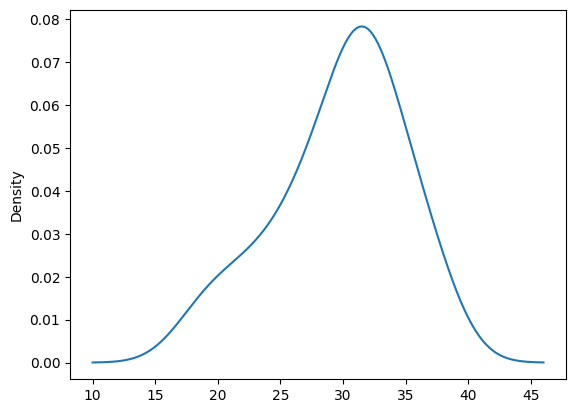

In [10]:
res = data_a["98"].plot.kde()

<Axes: ylabel='Density'>

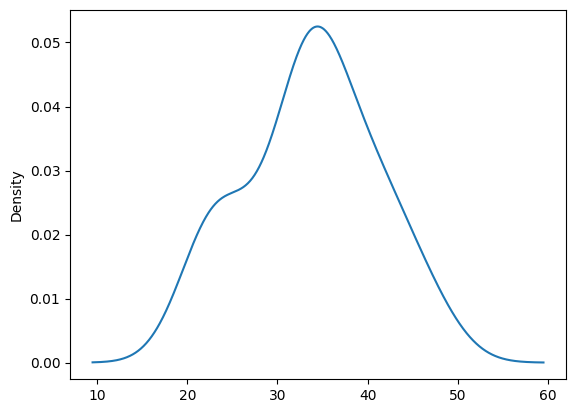

In [11]:
data_a["97"].plot.kde()